## Assignment 2 - Clustering

## Learning Outcomes

In this assignment, you will do the following:

* Explore a dataset and carry out clustering using k-means algorithm

* Identify the optimum number of clusters for a given dataset



## Problem Description

In this assignment, you will study the electricity demand from clients in Portugal, during 2013 and 2014. You have been provided with the data file, which you should download when you download this assignment file.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise, you will use clustering techniques to understand the typical usage behaviour during 2013-2014.

Both these datasets are publicly available, and can be used to carry out experiments. Their source is below:

 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm

We will start by exploring the data set and continue on to the assignment.  Consider this as a working notebook, you will add your work to the same notebook.

In this assignment we will use the sklearn package for k-means.  Please refer here for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The sklearn package for k-means is one of the many clustering algorithms found in the module "sklearn.cluster".  These come with a variety of functions that you can call by importing the package.

For example 
    
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans



## Data Preparation

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed. The data file has been provided with this assignment. It is also available at the links provided above.

In [1]:
#pathToFile = "~/Documents/UW Data Science/Machine Learning/assignment 2/assignment2-data/"
#pathToFile = "Users/paulo/Documents/UW Data Science/Machine Learning/assignment 2/assignment2-data/"
pathToFile = "assignment2-data/"
#pathToFile = r"C:\\Users\\<your username>\\Downloads\\"

fileName = 'LD2011_2014.txt'
print(pathToFile)

assignment2-data/


In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from datetime import datetime
random.seed(42)

In [3]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

fileName = 'LD2011_2014.txt'
print(pathToFile)

print('path', pathToFile)
print('filename', fileName)
print('test', pathToFile+fileName)

with fileinput.FileInput(pathToFile+fileName, inplace=True, backup='.bak') as file:
    #print('here')
    print('file', file)
    for line in file:
        print(line.replace(",", "."), end='')

assignment2-data/
path assignment2-data/
filename LD2011_2014.txt
test assignment2-data/LD2011_2014.txt
file <fileinput.FileInput object at 0x7f9d97e9f070>


In [4]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", index_col=0)

### Quick data inspection

In [5]:
#data

In [6]:
data.head(5)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.tail(5)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.175240,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [8]:
data.shape

(140256, 370)

#### As it can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [10]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot the first 2 days of 2012 for the first 2 clients

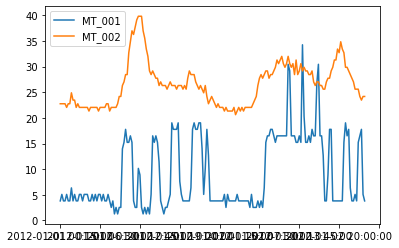

<Figure size 864x720 with 0 Axes>

In [11]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()

plt.figure(figsize=(12,10))
plt.show()

#### We  note that the main difference between the curves is the level (also seen on the means in df.describe()).  We know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day.

### Data for the analysis

We focus on 2013 and 2014 because these are the years with low number of clients having zero demand

In [12]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [13]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [14]:
# See number of clients with 0 demand per year

print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [15]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = data2013.append(data2014) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


## Getting average curves per client

In [16]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [17]:
data['hour'] = data.index.map(lambda x: x[11:])

In [18]:
data.head(3)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00


In [19]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,...,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000
mean,5.191112,28.106884,1.954785,114.508535,50.884390,189.447901,6.639154,255.688496,52.428693,57.792308,...,288.480586,48502.053368,2374.435184,3842.678497,80.222919,12.144033,556.904701,127.032402,820.311872,17456.658722
std,6.359491,6.332915,0.727959,38.580278,17.940264,64.874532,7.235114,58.588435,20.852845,25.709564,...,182.080880,35750.529364,1552.755546,2503.583722,52.255311,9.435227,154.172689,69.521835,138.275642,4092.050633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.269036,23.470839,1.737619,87.398374,37.804878,142.857143,2.826456,208.754209,38.461538,39.784946,...,114.917916,15900.000000,856.540084,1227.272727,23.468057,5.851375,481.123793,58.430718,714.076246,15221.621622
50%,2.538071,27.738265,1.737619,103.658537,48.780488,181.547619,3.957038,252.525253,47.202797,52.688172,...,310.492505,41200.000000,2236.286920,3522.727273,87.353325,8.777063,575.943810,123.539232,802.052786,17783.783784
75%,3.807107,32.005690,1.737619,132.113821,60.975610,223.214286,6.218202,292.929293,62.937063,70.967742,...,425.410421,68300.000000,3506.329114,6204.545455,108.213820,13.458163,654.082529,178.631052,895.894428,20216.216216
max,43.147208,67.567568,7.819288,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,195.698925,...,852.962170,181400.000000,7751.054852,12386.363636,267.275098,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Getting average curves per client

In [20]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape 

(96, 349)

#### The dataframe average_curves contains the 349 typical weekday electric demands

#### We now divide each curve by its mean, so that all curves have mean 1

In [21]:
average_curves_norm = average_curves/(average_curves.mean())
#print(average_curves_norm.head(5))

#### Plot the first 2 and last 2 clients

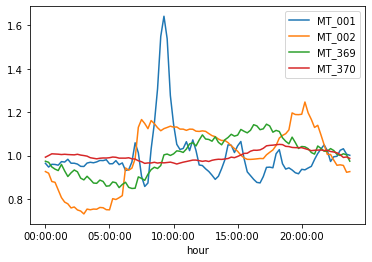

In [22]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

## Clustering Analysis on the average normalized curves

In [23]:
X = average_curves_norm.copy()  # We call this normalized curve
#print('x-1', X)
X = np.array(X.T) # put it on the right format
#print('x-2', X)

# Questions (15 marks total)

**Q1: (7 marks)**

a. Determine what a convenient number of clusters. Justify your choice.  Make use of the sklearn's package for k-means for this. You may refer to the module to figure out how to come up with the optimal number of clusters. 

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the center of the cluster (make this curve thicker to distinguish it from the individual curves).  The center is also sometimes referred to as "centroid".
    
You have 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

In [24]:
# Set X Data
X = data.iloc[:, 1:]
#print('before', X['hour'])
#for col in X.columns:
    #print(col)
#print(X.describe)
X = data.iloc[:, 1:].values
#print('after', X)
X = np.array(X.T)
#print('transpose', X)
X = np.array(data_13_14.T)
#print('13-14', X)

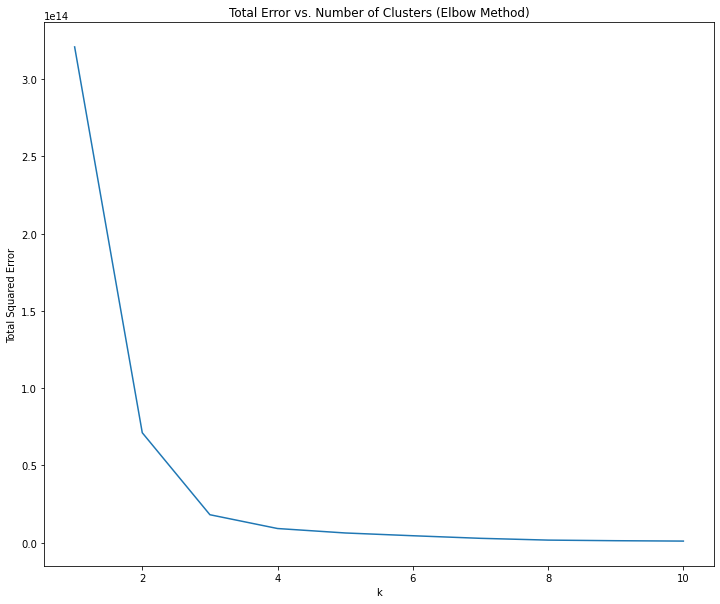

In [25]:
# total squared errors
total_squared_error = []

# loop through nodes and find the best number of nodes
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    total_squared_error.append(kmeans.inertia_)

# plot the elbow method
plt.figure(figsize=(12,10))
plt.plot(range(1, 11), total_squared_error)
plt.title('Total Error vs. Number of Clusters (Elbow Method)')
plt.xlabel('k')
plt.ylabel('Total Squared Error')
plt.show()

In [26]:
# find kmeans and silhouette scores

# cluster 2
#kmeans_model = KMeans(n_clusters=2, random_state=1).fit(X)
#labels = kmeans_model.labels_
#cluster_2 = metrics.silhouette_score(X, labels, metric='euclidean')
#print("cluster 2 silhouette score = ", cluster_2)

# we will be using 3 nodes
# cluster 3
# set clusters to 3
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
print(kmeans_model)
labels = kmeans_model.labels_
# true centroids
# set centroids to the cluster centers
kmeans_centroids = kmeans_model.cluster_centers_
cluster_3 = metrics.silhouette_score(X, labels, metric='euclidean')
print("cluster 3 silhouette score = ", cluster_3)

# cluster 4
#kmeans_model = KMeans(n_clusters=4, random_state=1).fit(X)
#labels = kmeans_model.labels_
#cluster_4 = metrics.silhouette_score(X, labels, metric='euclidean')
#print("cluster 4 silhouette score = ", cluster_4)

KMeans(n_clusters=3, random_state=1)
cluster 3 silhouette score =  0.9569788416824179


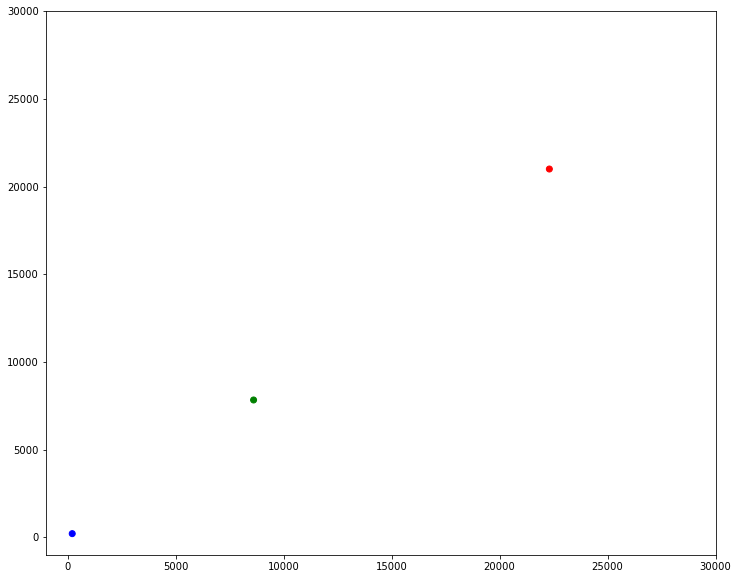

In [27]:
trueK = 3 # Desired number of clusters
colors = 'bgr'
colors=[*colors]
#print(colors)
dim = 2 # dimension of feature space
n = 40 # points per cluster
# set true centroids with kmeans
trueCentroids = kmeans_centroids
data = data_13_14
data['hour'] = data.index.map(lambda x: x[11:])

if dim==2:
    plt.figure(figsize=(12,10))
    # time series
    #plt.plot(data['hour'], trueCentroids[:,1], color=colors[:len(trueCentroids)])
    # scatter plot the centroids
    plt.scatter(trueCentroids[:,0],trueCentroids[:,1], color=colors[:len(trueCentroids)])
    plt.xlim(-1000,30000)
    plt.ylim(-1000,30000)
    plt.show()

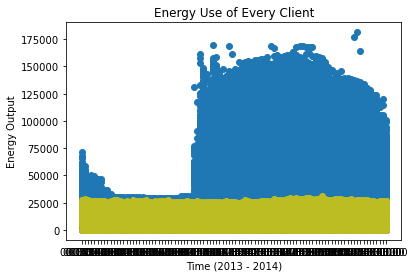

<Figure size 1440x1440 with 0 Axes>

In [28]:
# graph every client energy usage
fig, ax = plt.subplots()
# loop through every client
for client in data:
    if client != 'hour':
        ax.plot(data['hour'], data[client],  'o', label=client)
        #for J in range(2*365):
            #X.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 

plt.figure(figsize=(20,20))
ax.set_title('Energy Use of Every Client')
ax.set_xlabel('Time (2013 - 2014)')
ax.set_ylabel('Energy Output')
plt.show()

## Analysis
Looking at the elbow graph, the number of clusters that best represent the data is 3 since the graph bends there. Furthermore, looking at the silhouette scores, 

**Q2: (8 marks)**

In this exercise you work with the daily curves of 1 single client.
First, create a list of arrays, each array containing a curve for a day. You may use X from the cells above.
    X = average_curves_norm.copy() 
The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value of k ( number of clusters). This time you may also perform silhoutte analysis as stated in the module. Carrying out silhoutte analysis is left as an exercise. What do you understand about the clusters? 

b. Based on your results from your analyses of both methods, what do understand?  Interpret it perhaps with different perspectives of timelines like weeks or months.

#### The following cell generates a list of all the days in the two years 2013-2014, which is helpful to answer part (b).  The cells below are only to give you a headstart.  You may or may not use these and come up with your own interpretation.


In [29]:
from datetime import date, timedelta

d1 = date(2013, 1, 1)  # start date
d2 = date(2014, 12, 31)  # end date
delta = d2 - d1         # timedelta
daysyear = []
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1 + timedelta(days=i)).weekday()]+"-"+str(d1 + timedelta(days=i))])

In [30]:
X = average_curves_norm.copy() 
X.head(5)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
hour,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.964792,0.926674,0.991800,1.140106,1.186498,1.008914,1.170686,0.946572,0.983915,0.948867,...,0.414676,0.748555,0.561491,0.430085,0.471574,1.358632,1.215272,1.170441,0.974307,0.992967
00:15:00,0.947378,0.919117,0.977796,1.099159,1.131703,0.946419,1.118666,0.909376,0.953996,0.924425,...,0.414381,0.662602,0.412336,0.375704,0.423108,1.365299,1.184899,1.223818,0.969266,1.000548
00:30:00,0.960104,0.880744,0.976579,1.061641,1.090238,0.905552,1.081459,0.881217,0.931614,0.908674,...,0.386706,0.561815,0.395294,0.344682,0.386975,1.312627,1.177781,1.211343,0.947969,1.008515
00:45:00,0.959434,0.877243,0.971708,1.030153,1.053960,0.868064,1.056382,0.855331,0.907404,0.885073,...,0.337499,0.499651,0.352628,0.295219,0.377024,1.245171,1.156699,1.189829,0.937889,1.007613
01:00:00,0.956085,0.841989,0.953443,0.975761,1.024347,0.822656,1.030838,0.830275,0.888265,0.869041,...,0.318475,0.422753,0.342066,0.288892,0.369187,1.292298,1.149629,1.167326,0.931284,1.006770


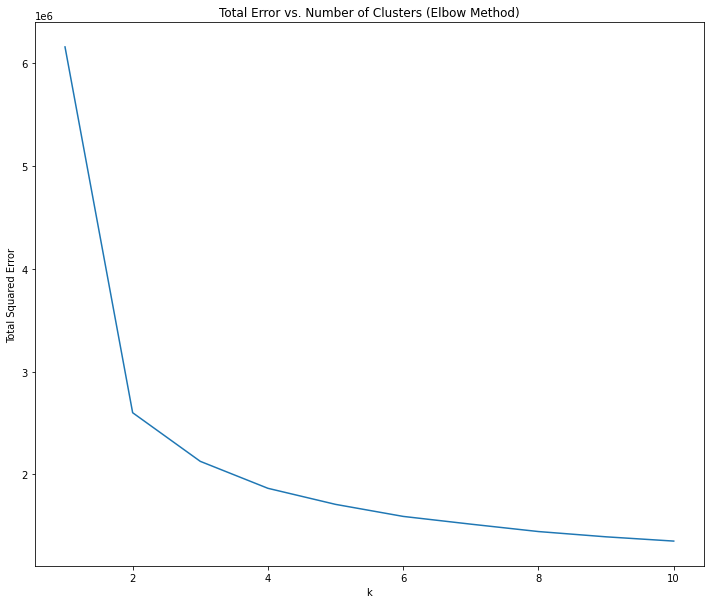

In [31]:
# use client MT_022
client = 'MT_022'
data = data_13_14
data['hour'] = data.index.map(lambda x: x[11:])
oneClient = data[client]

X = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 

#print('x', X)

# total squared errors
total_squared_error = []

# loop through nodes 1 to 11
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    total_squared_error.append(kmeans.inertia_)

# plot kmeans
plt.figure(figsize=(12,10))
plt.plot(range(1, 11), total_squared_error)
plt.title('Total Error vs. Number of Clusters (Elbow Method)')
plt.xlabel('k')
plt.ylabel('Total Squared Error')
plt.show()

In [32]:
# calculate the silhouette scores of each cluster
for cluster in range(2, 11):
    kmeans_model = KMeans(n_clusters=cluster, random_state=1).fit(X)
    labels = kmeans_model.labels_
    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    print("cluster", cluster, "silhouette score = ", silhouette_score)

cluster 2 silhouette score =  0.5011374240143706
cluster 3 silhouette score =  0.28219774161561895
cluster 4 silhouette score =  0.2809197902174719
cluster 5 silhouette score =  0.2196591577577872
cluster 6 silhouette score =  0.19130102609088037
cluster 7 silhouette score =  0.19110553294674834
cluster 8 silhouette score =  0.18228945938505678
cluster 9 silhouette score =  0.18267141805423623
cluster 10 silhouette score =  0.18360699079201817


## 2a
### Analysis
#### Client MT_022
Using the Elbow Method and observing the graph, we can see a clear bend when k = 2 or at 2 clusters. After the graph reaches 2 clusters, the rate of decrease is significantly reduced. 

Furthermore, when calculating the silhouette scores of the clusters we can see that at cluster 2 there is a silhouette score of 0.501, at 3 clusters there is a score of 0.282, and at 4 clusters there is a score of 0.281. We can conclude that 2 clusters best represent Client MT_022 because of the higher silhouette score. Every score after is significantly lower and will have worse results.

In [33]:
# MT_022
data = data_13_14
data['hour'] = data.index.map(lambda x: x[11:])

# set oneClient to MT_022 data
oneClient = data[client]

# create day list array
day_list = []
for i, x in enumerate(oneClient):
    # convert time stamp to day of week
    date_time = datetime.strptime(oneClient.index[i], '%Y-%m-%d %H:%M:%S')
    day_list.append(date_time.weekday())

# set column to day_list data
data['day'] = day_list

# create timeseries df
client_ts = data['day']
client_ts.index = pd.to_datetime(client_ts.index)

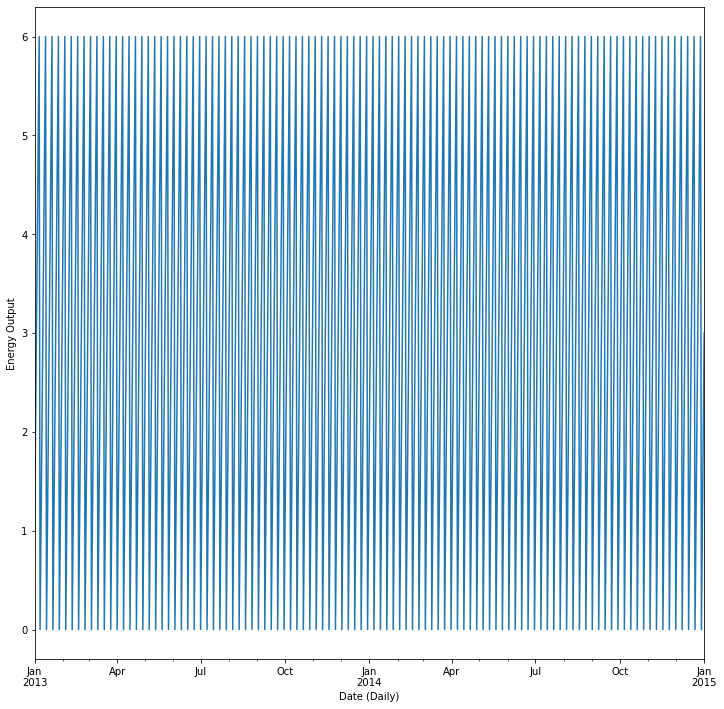

In [34]:
# plot daily time series of MT_022
client_ts = data['day']
client_ts = client_ts.resample('D').mean()
plt.figure(figsize=(12,12))
ax=client_ts.plot()
ax.set_xlabel('Date (Daily)')
ax.set_ylabel('Energy Output')

plt.show()

## Daily
Looking at the daily data, we can see that the energy usage is very consistent throughout the years of 2013 to 2014.

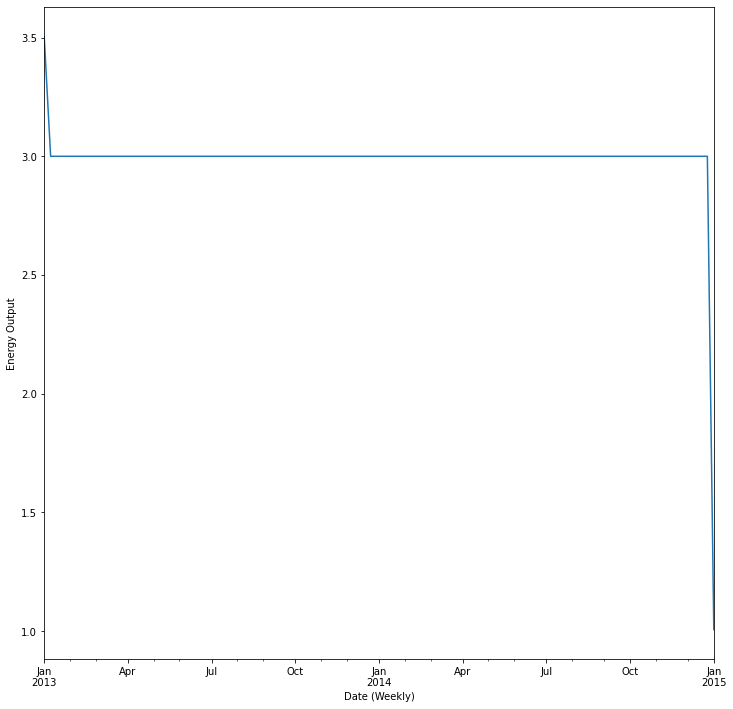

In [35]:
# plot weekly time series of MT_022
client_ts = data['day']
client_ts = client_ts.resample('W').mean()
plt.figure(figsize=(12,12))
ax=client_ts.plot()
ax.set_xlabel('Date (Weekly)')
ax.set_ylabel('Energy Output')
plt.show()

## Weekly
Looking at the weekly time series, we can see that weekly energy usage is very consistent.

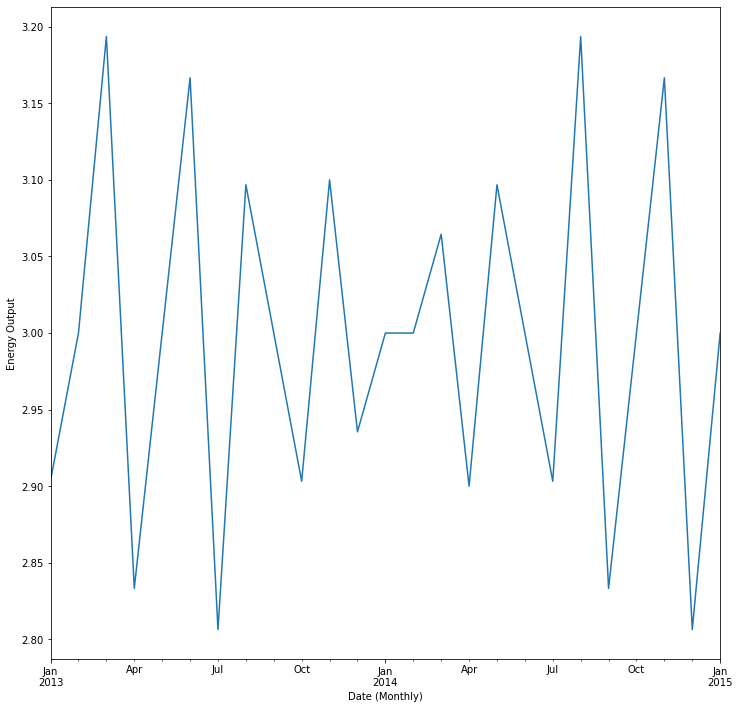

In [36]:
# plot monthly time series of MT_022
client_ts = data['day']
client_ts = client_ts.resample('M').mean()
plt.figure(figsize=(12,12))
ax=client_ts.plot()
ax.set_xlabel('Date (Monthly)')
ax.set_ylabel('Energy Output')
plt.show()

## Monthly
Looking at the monthly data, we can see a much different result from the previous time series graphs. We can see an decrease of energy in the leading months up to April, July, and October. In between those months we see a significant increase of energy usage. We can see that energy only decreases when spring approaches, mid summer approaches and when fall begins. However, in 2014 we can see a significant use of energy in the early months compared to 2013.

## Analysis

After looking at the timeseries, it makes sense to use 2 clusters of data since 2013 and 2014 data are different when compared. Although they follow a similar trend, we must separate this data since the year to year comparison has a lot of variance. The weekly and daily timeseries data seems almost irrelevant since they look consistent through the years. We should be using the yearly data as clusters.